In [1]:
import numpy as np
import matplotlib.pyplot as plt

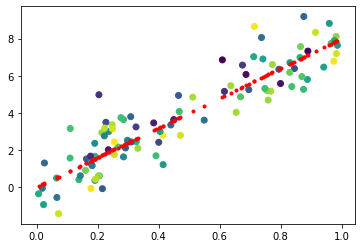

In [16]:
x = np.random.rand(100)
y = 8 * x + np.random.randn(100)
cc = np.random.rand(100)
plt.scatter(x, y, c=cc)

plt.plot(x, 8*x, 'r.')

In [22]:
# Build data
x_values = list(range(11))
print(x_values)

x_train = np.array(x_values, dtype=np.float32)
print(x_train.shape)
x_train = x_train.reshape(-1,1)
print(x_train.shape)

y_train = 2*x_train + 1
print(y_train.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
(11,)
(11, 1)
(11, 1)


In [89]:
# Build model

import torch
import torch.nn as nn
from torch.autograd import Variable

class LinearRegresson(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegresson, self).__init__()
        self.Linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.Linear(x)
        return out

input_dim = 1
output_dim = 1
model = LinearRegresson(input_dim, output_dim)

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch 0, loss 59.00682067871094
epoch 10, loss 0.0023655719123780727
epoch 20, loss 0.0021142950281500816
epoch 30, loss 0.001889738254249096
epoch 40, loss 0.0016889955149963498


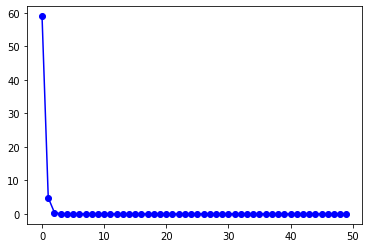

In [90]:
epochs = 50

inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))
loss_vec = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()
    
    optimizer.step()
    
    loss_value = loss.data.numpy().reshape(1)[0]
    loss_vec.append(loss_value)
    if epoch%10==0:
        print('epoch {}, loss {}'.format(epoch,loss_value))
plt.plot(loss_vec,'bo-')

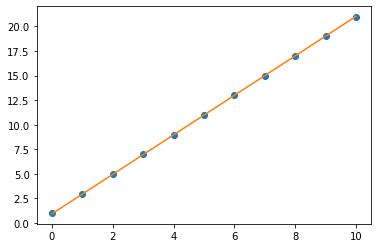

In [91]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, predicted, '-')

In [92]:
#Save model with only parameters
torch.save(model.state_dict(), 'linearreg_model.pkl')

In [93]:
#Load model
model.load_state_dict(torch.load('linearreg_model.pkl'))

<All keys matched successfully>

# GPU implementation

In [103]:
# Model should be on GPU
# Variables should be on GPU

epoch 0, loss 287.6000061035156
epoch 10, loss 0.028136830776929855
epoch 20, loss 0.025148112326860428
epoch 30, loss 0.02247679978609085
epoch 40, loss 0.020089300349354744
epoch 50, loss 0.0179554745554924
epoch 60, loss 0.01604813151061535
epoch 70, loss 0.014343530870974064
epoch 80, loss 0.012819946743547916
epoch 90, loss 0.011458220891654491


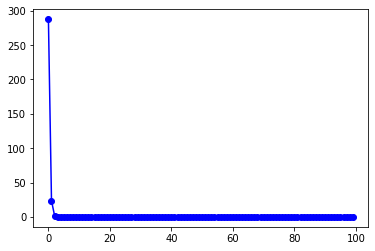

In [104]:
class LinearRegresson(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegresson, self).__init__()
        self.Linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.Linear(x)
        return out

input_dim = 1
output_dim = 1
model = LinearRegresson(input_dim, output_dim)
if torch.cuda.is_available():
    model.cuda()

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100

if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
else:
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

loss_vec = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()
    
    optimizer.step()
    
    loss_value = loss.data.cpu().numpy().reshape(1)[0]
    loss_vec.append(loss_value)
    if epoch%10==0:
        print('epoch {}, loss {}'.format(epoch,loss_value))
plt.plot(loss_vec,'bo-')

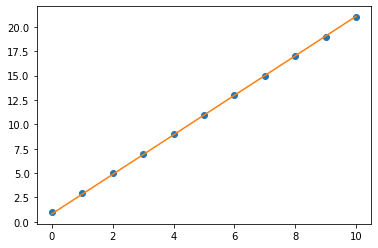

In [106]:
model.cpu()
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, predicted, '-')